In [1]:
import numpy as np
import astropy
import astropy.units as ur
import astropy.constants as cr
%matplotlib inline
from tdsat_sensitivity import find_limit, compute_snr
import matplotlib.pyplot as plt


In [2]:
# Set inputs here. Currently set at Ultrasat values to compare with Rick
qe = 0.8
exposure = 300*ur.s
psf_size = 10*ur.arcsec
efficiency = 0.87


td1_band = [180, 220]*ur.nm
td2_band = [260, 320]*ur.nm
td3_band = [340, 380]*ur.nm





In [3]:
# Loop over "effective area" where we basically freeze the telescope diameter at 35 cm
# and then see what the effective of changing the optical efficiency is. Do this here
# for the "low" zodiacal light case for the td2_band.

diameter = 35*ur.cm
effArea = []
psf_req = []
for eff in np.arange(10)/20.:
    efficiency = (0.9 - eff)
    area = efficiency*np.pi * (0.5*diameter)**2
    psf_array = (15 - np.arange(15))
    psf_array = np.append(psf_array, 0.01)
    found = False
    last_psf = 15
    for psf in psf_array:

        psf_size = psf*ur.arcsec
        
        snr = compute_snr(td2_band,22*ur.ABmag, low_zodi=True,diameter=diameter,
                          efficiency = efficiency, qe = qe, psf_size = psf_size)
        
        if (snr <= 10.):
            last_psf = psf
            continue
        else:
            found = True
            break
            
    if found:
        psf_req.append(last_psf)
        print(efficiency, area, last_psf, snr)

    else:
        print('Not found...')
        psf_req.append(0.)
        print(efficiency, area, 0., snr)

    effArea.append(area.value)
 
    



0.9 865.9014751456867 cm2 6.0 10.422954328290173
0.85 817.795837637593 cm2 5.0 10.466391297074805
0.8 769.6902001294993 cm2 4.0 10.37754603805874
0.75 721.5845626214056 cm2 3.0 10.13785117391575
Not found...
0.7 673.4789251133119 cm2 0.0 9.798963530831504
Not found...
0.65 625.3732876052181 cm2 0.0 9.208418942547892
Not found...
0.6 577.2676500971246 cm2 0.0 8.604777495080084
Not found...
0.55 529.1620125890308 cm2 0.0 7.987322392661146
Not found...
0.5 481.0563750809371 cm2 0.0 7.35527611336309
Not found...
0.45 432.95073757284337 cm2 0.0 6.707793424299714


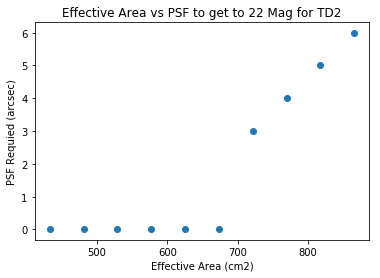

In [4]:

plt.scatter(effArea, psf_req)
plt.title('Effective Area vs PSF to get to 22 Mag for TD2')
plt.ylabel('PSF Requied (arcsec)')
plt.xlabel('Effective Area (cm2)')
plt.show()



In [5]:
# Loop over "effective area" where we basically freeze the telescope diameter at 35 cm
# and then see what the effective of changing the optical efficiency is. Do this here
# for the "low" zodiacal light case for the td2_band.

diameter = 35*ur.cm
effArea = []
psf_req = []
for eff in np.arange(10)/20.:
    efficiency = (0.9 - eff)
    area = efficiency*np.pi * (0.5*diameter)**2
    psf_array = (15 - np.arange(15))
    psf_array = np.append(psf_array, 0.01)
    found = False
    last_psf = 15
    for psf in psf_array:

        psf_size = psf*ur.arcsec
        
        snr = compute_snr(td1_band,22*ur.ABmag, low_zodi=True,diameter=diameter,
                          efficiency = efficiency, qe = qe, psf_size = psf_size)
        
        if (snr <= 10.):
            last_psf = psf
            continue
        else:
            found = True
            break
            
    if found:
        psf_req.append(last_psf)
        print(efficiency, area, last_psf, snr)

    else:
        print('Not found...')
        psf_req.append(0.)
        print(efficiency, area, 0., snr)

    effArea.append(area.value)
 
    



0.9 865.9014751456867 cm2 15 10.707175090175102
0.85 817.795837637593 cm2 15 10.2506840688817
0.8 769.6902001294993 cm2 13.0 10.068299997411755
0.75 721.5845626214056 cm2 5.0 10.027053891829345
Not found...
0.7 673.4789251133119 cm2 0.0 9.524967516487997
Not found...
0.65 625.3732876052181 cm2 0.0 8.94849413727628
Not found...
0.6 577.2676500971246 cm2 0.0 8.359499109899462
Not found...
0.55 529.1620125890308 cm2 0.0 7.7573128630782495
Not found...
0.5 481.0563750809371 cm2 0.0 7.141210467928171
Not found...
0.45 432.95073757284337 cm2 0.0 6.510405429717152


In [ ]:

plt.scatter(effArea, psf_req)
plt.title('Effective Area vs PSF to get to 22 Mag for TD2')
plt.ylabel('PSF Requied (arcsec)')
plt.xlabel('Effective Area (cm2)')
plt.show()